In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pickle

pd.set_option('max_rows', 300)
pd.set_option('max_columns', 30)

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,...,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,...,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,...,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,...,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,...,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,...,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452


In [6]:
data.shape

(30471, 292)

In [7]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,30471.0,15237.92,8796.50,1.00,7620.50,15238.00,22855.50,3.047300e+04
full_sq,30471.0,54.21,38.03,0.00,38.00,49.00,63.00,5.326000e+03
life_sq,24088.0,34.40,52.29,0.00,20.00,30.00,43.00,7.478000e+03
floor,30304.0,7.67,5.32,0.00,3.00,6.50,11.00,7.700000e+01
max_floor,20899.0,12.56,6.76,0.00,9.00,12.00,17.00,1.170000e+02
material,20899.0,1.83,1.48,1.00,1.00,1.00,2.00,6.000000e+00
build_year,16866.0,3068.06,154387.80,0.00,1967.00,1979.00,2005.00,2.005201e+07
num_room,20899.0,1.91,0.85,0.00,1.00,2.00,2.00,1.900000e+01
kitch_sq,20899.0,6.40,28.27,0.00,1.00,6.00,9.00,2.014000e+03
state,16912.0,2.11,0.88,1.00,1.00,2.00,3.00,3.300000e+01


<AxesSubplot:>

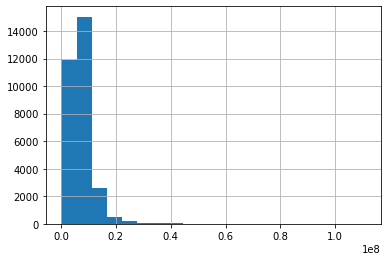

In [8]:
data.price_doc.hist(bins=20)

In [9]:
#Видим что минимальная цена начинается от 100000, что очень сомнительно. Посмотрим на распределение цены подробнее
data.price_doc.describe().round(0)

count        30471.0
mean       7123035.0
std        4780111.0
min         100000.0
25%        4740002.0
50%        6274411.0
75%        8300000.0
max      111111112.0
Name: price_doc, dtype: float64

In [10]:
# Видим что у 5% всего датасета цена менее 2млн.руб., что также странно. Встретить такие цены в Москве крайне маловероятно.
data.price_doc.quantile(0.05).round(0)

2000000.0

In [11]:
#Кол-во квартир с ценой менее 2млн.руб.
len(data.loc[data.price_doc < 2000000])

1308

In [12]:
#Посмотрим на кол-во пропусков по столбцам, видим что тих достаточно много и сразу понимаем что линейная регрессия в качестве
#модели предсказания на не подойдет.
data.isna().sum().sort_values(ascending = False)

hospital_beds_raion                      14441
build_year                               13605
state                                    13559
cafe_avg_price_500                       13281
cafe_sum_500_max_price_avg               13281
cafe_sum_500_min_price_avg               13281
max_floor                                 9572
material                                  9572
num_room                                  9572
kitch_sq                                  9572
preschool_quota                           6688
school_quota                              6685
cafe_sum_1000_max_price_avg               6524
cafe_avg_price_1000                       6524
cafe_sum_1000_min_price_avg               6524
life_sq                                   6383
build_count_wood                          4991
build_count_frame                         4991
build_count_brick                         4991
build_count_monolith                      4991
build_count_foam                          4991
build_count_p

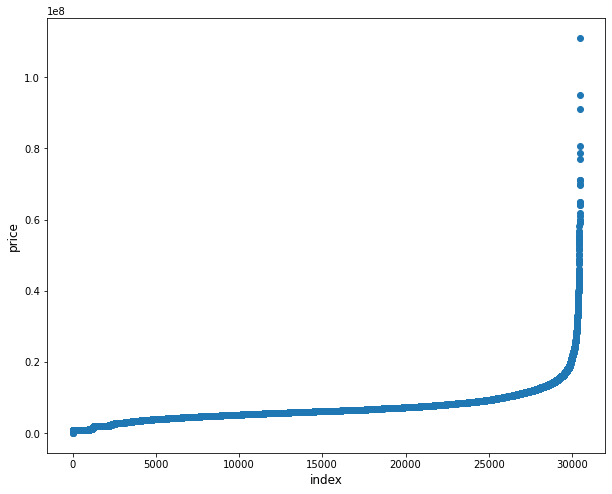

In [13]:
#Построим точечную диаграмму, чтобы увидеть, есть ли какие-либо выбросы в данных. Видим, что есть ряд очень дорогих объектов свыше 80 млн. руб.

plt.figure(figsize=(10,8))
plt.scatter(range(data.shape[0]), np.sort(data.price_doc.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

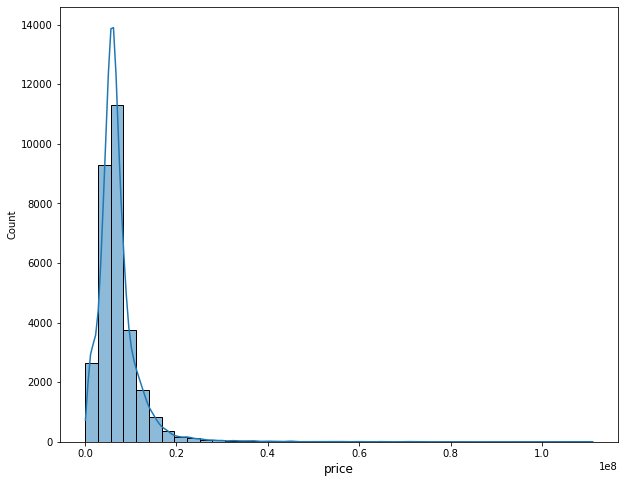

In [14]:
#Построим гистограмму плотности распределения по цене
plt.figure(figsize=(10,8))
sns.histplot(data.price_doc.values, bins=40, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

### Видим что у нас очень длинный правый "хвост". Поскольку наша метрика представляет собой среднеквадратичную логарифмическую ошибку, построим логарифм переменной price_doc.

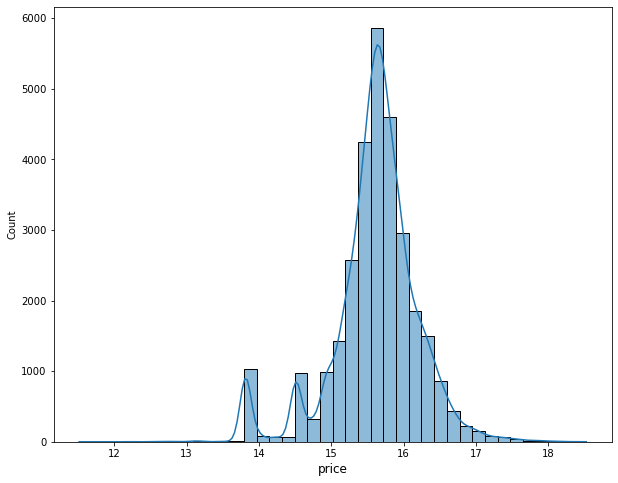

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(np.log(data.price_doc.values), bins=40, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [16]:
#Видим, что экстремально дешевые квартиры обособленно находятся на log-шкале в районе 14.
print(np.log(1500000))
print(len(data.loc[data.price_doc < 1500000]))

14.22097566607244
1162


### Теперь посмотрим как меняется средняя и медианная цена жилья со временем по месяцам

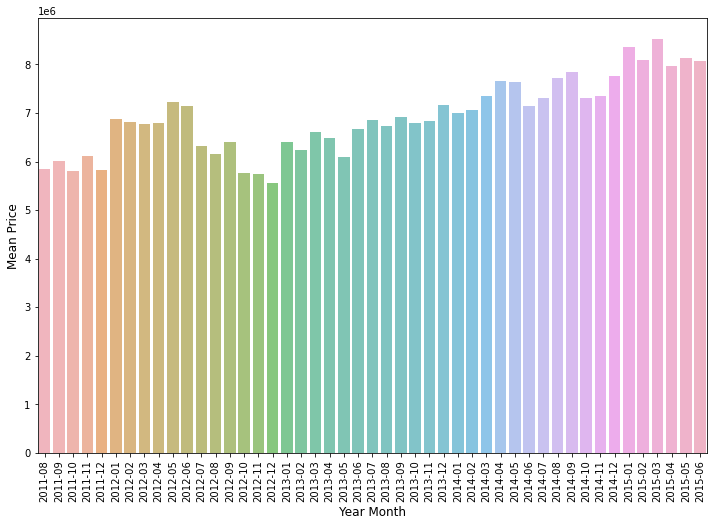

In [17]:
#Средняя цена
data['yearmonth'] = data['timestamp'].apply(lambda x: x[:4]+'-'+x[5:7])
data_grouped = data.groupby('yearmonth')['price_doc'].aggregate(np.mean).reset_index()

plt.figure(figsize=(12,8))
sns.barplot(data = data_grouped, x='yearmonth', y='price_doc', alpha=0.7)
plt.ylabel('Mean Price', fontsize=12)
plt.xlabel('Year Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

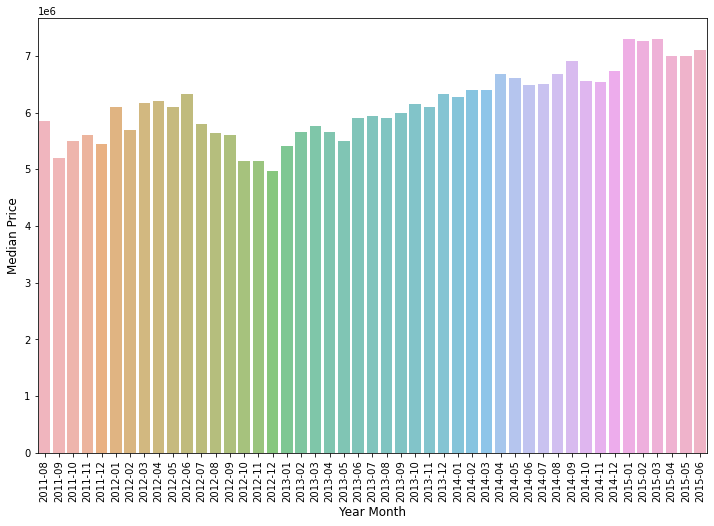

In [18]:
#Медианная цена
data['yearmonth'] = data['timestamp'].apply(lambda x: x[:4]+'-'+x[5:7])
data_grouped = data.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.barplot(data = data_grouped, x='yearmonth', y='price_doc', alpha=0.7)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Year Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### Видим что цена за 4 года в среднем увеличилась на 20%

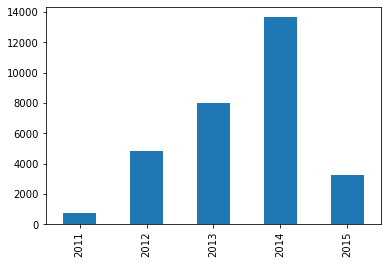

In [19]:
# Посмотрим на кол-во сделок по годам, видим что пик приходится на 2014г  - это около 45% всех сделок из датасета.
ts = data.timestamp.str[:4]
ts.value_counts().sort_index().plot(kind='bar')
plt.show()

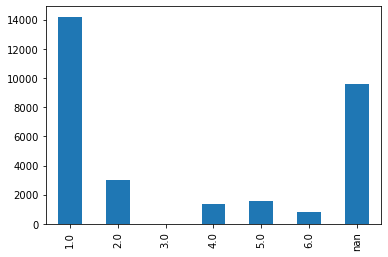

In [20]:
# Посмотрим на материалы стен, что преобладает.
tm = data.material.value_counts(dropna=False)
tm.sort_index().plot(kind='bar')
plt.show()

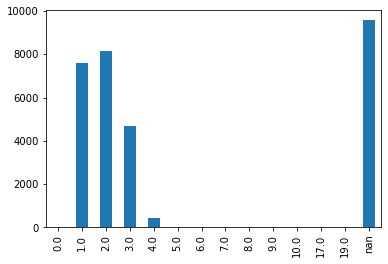

In [21]:
# Посмотрим на кол-во комнат. Видим что около 30% пропущено. Есть ряд объектов с кол-вом комнат более 6, их посмотри более подробно возможно это ошибки.
# Преобладают 1-2 комнатные квартиры.
tn = data.num_room.value_counts(dropna=False)
tn.sort_index().plot(kind='bar')
plt.show()

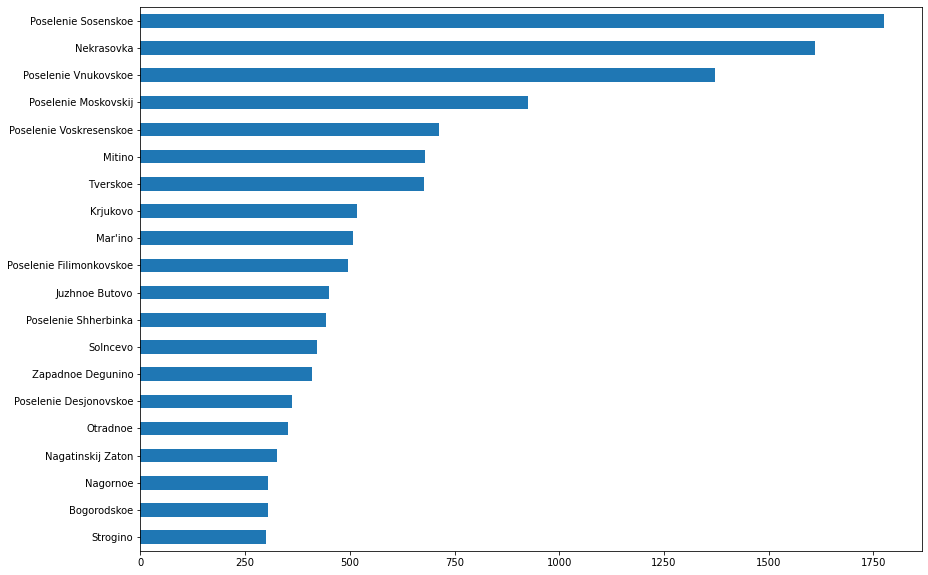

In [22]:
#Посмотрим на 20 самых крупных по кол-ву сделок районов
plt.figure(figsize=(14,10))
tr = data.sub_area.value_counts(dropna=False)
tr[:20].sort_values().plot(kind='barh')
plt.show()

In [23]:
# Посмотрим на тип покупаемой недвижимости. Видим что около 64% - это вторичное жилье, 36% - новостройки.
data.product_type.value_counts(dropna = False, normalize = True).round(3)

Investment       0.638
OwnerOccupier    0.362
Name: product_type, dtype: float64

In [24]:
# Посмотрим на жилой фонд по году постройки. Видим что более половины жилого фонда - это дома старше 1979г.
data.build_year.describe().round(0)

count       16866.0
mean         3068.0
std        154388.0
min             0.0
25%          1967.0
50%          1979.0
75%          2005.0
max      20052009.0
Name: build_year, dtype: float64

In [25]:
#Посмотрим на средние и медианные цены по районам, а также кол-во сделок по районам.
data.groupby('sub_area')['price_doc'].agg(['count', 'mean', 'median']).round(0)

,count,mean,median
sub_area,,,
Ajeroport,123,9888950.0,8400000.0
Akademicheskoe,211,10575756.0,9000000.0
Alekseevskoe,100,8978796.0,7500000.0
Altuf'evskoe,68,5516202.0,5950000.0
Arbat,15,15794800.0,12000000.0
Babushkinskoe,123,7637642.0,6950000.0
Basmannoe,98,11587719.0,10450000.0
Begovoe,60,10623609.0,9600000.0
Beskudnikovskoe,166,6770565.0,6450000.0


In [26]:
#Посмотрим на средние и медианные цены в зависимости от кол-ва комнат
data.groupby('num_room')['price_doc'].agg(['count', 'mean', 'median']).round(0)

,count,mean,median
num_room,,,
0.0,14,7927055.0,7590001.0
1.0,7602,5330567.0,5250000.0
2.0,8132,7205595.0,6824494.0
3.0,4675,10269687.0,9205505.0
4.0,418,17903708.0,14400000.0
5.0,40,20458308.0,16850000.0
6.0,9,28676993.0,23000000.0
7.0,1,25500000.0,25500000.0
8.0,3,33855867.0,35000000.0


### CatBoost

In [27]:
df2 = data[['full_sq', 'life_sq', 'build_year', 'floor', 'park_km', 'green_zone_part', 'water_km', 'bulvar_ring_km', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_5000', 'material', 'state', 'indust_part', 'university_top_20_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'zd_vokzaly_avto_km', 'stadium_km', 'num_room', 'kitch_sq', 'product_type', 'raion_popul', 'metro_km_walk', 'mkad_km', 'ttk_km', 'kremlin_km', 'oil_chemistry_km', 'radiation_raion', 'max_floor', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'railroad_terminal_raion', 'big_market_raion', 'detention_facility_raion', 'ID_metro', 'price_doc']]

In [28]:
X = ['full_sq', 'life_sq', 'build_year', 'water_km', 'green_zone_part', 'bulvar_ring_km', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_5000', 'material', 'state', 'indust_part', 'university_top_20_raion', 'culture_objects_top_25_raion',
       'shopping_centers_raion', 'office_raion', 'zd_vokzaly_avto_km', 'num_room', 'kitch_sq',
       'product_type', 'raion_popul', 'metro_km_walk', 'mkad_km', 'stadium_km',
       'ttk_km', 'kremlin_km', 'oil_chemistry_km', 'radiation_raion', 'floor',
       'max_floor', 'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'railroad_terminal_raion', 'big_market_raion',
       'detention_facility_raion', 'ID_metro']
cat_features = ['product_type', 'radiation_raion', 'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'railroad_terminal_raion', 'big_market_raion',
       'detention_facility_raion']
y = ['price_doc']

In [29]:
train, test = train_test_split(df2, train_size=0.6, random_state=42)

In [30]:
val, test = train_test_split(test, train_size=0.5, random_state=42)

In [31]:
model = CatBoostRegressor(cat_features = cat_features, eval_metric= 'MAPE', verbose = 200)

In [32]:
model.fit(train[X], train[y], eval_set=(val[X],val[y]))

Learning rate set to 0.080359
0:	learn: 0.6630297	test: 0.6701608	best: 0.6701608 (0)	total: 161ms	remaining: 2m 40s
200:	learn: 0.4272848	test: 0.4423121	best: 0.4423121 (200)	total: 1.55s	remaining: 6.18s
400:	learn: 0.4041909	test: 0.4349948	best: 0.4349948 (400)	total: 2.97s	remaining: 4.43s
600:	learn: 0.3840219	test: 0.4311562	best: 0.4311562 (600)	total: 4.41s	remaining: 2.93s
800:	learn: 0.3663582	test: 0.4276756	best: 0.4276756 (800)	total: 5.8s	remaining: 1.44s
999:	learn: 0.3507068	test: 0.4261039	best: 0.4261039 (999)	total: 7.1s	remaining: 0us

bestTest = 0.4261038712
bestIteration = 999



### Видим что на всём датасете с экстремально дешевыми квартирами наш bestTest = 0.4261 по метрике MAPE, что крайне плохой показатель, т.е. в среднем мы ошибаемся на 40% в цене квартиры.Попробуем поисследовать как наша метрика будет меняться после отсечения дешевых квартир.

In [33]:
#Возьмем квартиры более 1млн.руб и обучимся на них.
df3 = df2.loc[df2.price_doc > 1000000]

In [34]:
train, test = train_test_split(df3, train_size=0.6, random_state=42)
val, test = train_test_split(test, train_size=0.5, random_state=42)
model = CatBoostRegressor(cat_features = cat_features, eval_metric= 'MAPE', verbose = 200)
model.fit(train[X], train[y], eval_set=(val[X],val[y]))

Learning rate set to 0.079947
0:	learn: 0.4882073	test: 0.4800723	best: 0.4800723 (0)	total: 7.84ms	remaining: 7.83s
200:	learn: 0.2497791	test: 0.2692435	best: 0.2692435 (200)	total: 1.27s	remaining: 5.07s
400:	learn: 0.2312658	test: 0.2614022	best: 0.2614022 (400)	total: 2.56s	remaining: 3.82s
600:	learn: 0.2186029	test: 0.2583647	best: 0.2583647 (600)	total: 3.81s	remaining: 2.53s
800:	learn: 0.2077022	test: 0.2564264	best: 0.2564264 (800)	total: 5.17s	remaining: 1.28s
999:	learn: 0.1980391	test: 0.2555825	best: 0.2554933 (956)	total: 6.53s	remaining: 0us

bestTest = 0.2554933428
bestIteration = 956

Shrink model to first 957 iterations.


### Видим что наш bestTest = 0.2554 по метрике MAPE, что является значительным приростом по сравнению 0.4261.
### Аналогичным образом меняя пороги мин. цены получим следующие рез-ты:

### > 1,5млн. руб - bestTest = 0.2181
### > 1,6млн. руб - bestTest = 0.2141
###  > 1,7млн. руб - bestTest = 0.2154
###  > 1,8млн. руб - bestTest = 0.2154
###  > 1,9млн. руб - bestTest = 0.2040
###  > 2,0млн. руб - bestTest = 0.1498
###  > 2,1млн. руб - bestTest = 0.1385
###  > 2,2млн. руб - bestTest = 0.1396
###  > 2,3млн. руб - bestTest = 0.1353
###  > 2,4млн. руб - bestTest = 0.1350
###  > 2,5млн. руб - bestTest = 0.1351

### Видим резкое улучшение метрики при пороге 2,0млн.руб. и затем динамика резко падает. Разумным будет взять отсечку в 2,1млн.руб., т.к. после дальнейшего увеличения порога улучшений практически не наблюдается.

### XGBoost

In [35]:
inputs = ['public_transport_station_km', 'trc_count_2000','leisure_count_500',
          'full_sq' ,'sub_area','university_top_20_raion']

In [36]:
data = data.drop('id',axis=1)

In [37]:
null_cols = data.columns[data.isnull().any()]
new_data = data.drop(null_cols, axis = 1)
num_data = new_data.select_dtypes(exclude=['object'])

In [38]:
new_data.shape

(30471, 241)

In [39]:
cat_data = data.select_dtypes(exclude = ['int64','float64']).copy()

In [40]:
cat_data.drop('timestamp',axis=1,inplace=True)

In [41]:
dummies_sub = pd.get_dummies(cat_data.sub_area)
dummies_sub = dummies_sub.drop('Ajeroport',axis=1)
cat_data.drop('sub_area',axis=1,inplace=True)


In [42]:
dummies_ec = pd.get_dummies(cat_data.ecology)
dummies_ec = dummies_ec.drop('no data',axis=1)
cat_data.drop('ecology',axis=1,inplace=True)


In [43]:
labelencoder = LabelEncoder()

In [44]:
for column in cat_data:
    cat_data.loc[:,column] = labelencoder.fit_transform(cat_data.loc[:,column])

In [45]:
final_cat = pd.concat([cat_data,dummies_ec,dummies_sub] ,axis=1)

In [46]:
final1 = pd.concat([final_cat,num_data],axis=1)

In [47]:
# Матрица корреляции
corr_matrix = final1.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9) and column not in inputs ]

<ipython-input-47-fd1164883e32>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [48]:
final_nocorr = final1.drop(to_drop,axis=1)

In [49]:
nums = num_data.mean(axis=0).reset_index().T
nums.columns = nums.iloc[0]
nums = nums.reindex(nums.index.drop('index'))
cats = pd.DataFrame()
for column in dummies_sub:
    cats.loc[0,column]=0
for column in dummies_ec:
    cats.loc[0,column]=0
b = cat_data.mode(axis=0)
inp = pd.concat([b,cats,nums],axis=1)
inp = inp.drop(to_drop,axis=1)
inp = inp.drop('price_doc',axis=1)
# сохраняем модель на диск:
filename_inp = 'input.csv'
pickle.dump(inp, open(filename_inp, 'wb'))

In [50]:
sc = StandardScaler()

In [51]:
x = final_nocorr.drop("price_doc", axis = 1)
y = final_nocorr.price_doc
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [52]:
X_train = sc.fit_transform(X_train)

In [53]:
X_test = sc.transform(X_test)

In [54]:
filename_sc = 'scalar.sav'
pickle.dump(sc, open(filename_sc, 'wb'))


In [55]:
model_gb = GradientBoostingRegressor(random_state=42)
gb = model_gb.fit(X_train,y_train)


In [56]:
filename_gb = 'gb_model.sav'
pickle.dump(gb, open(filename_gb, 'wb'))
 